In [1]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Consultants\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv('./uci-news-aggregator.csv')
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [3]:
df.drop(['ID','URL'],axis = 1,inplace = True)
df.drop(['HOSTNAME','TIMESTAMP','STORY','PUBLISHER'],axis = 1,inplace = True)

In [4]:
df = df.sample(frac=1)
df.head()

,TITLE,CATEGORY
283843,All Our Patent Are Belong To You,t
267641,"#PreMarket Primer: Tuesday, June 3: Bidding On...",b
123689,Review: Family is greatest strength of 'Heaven...,e
14838,Madonna shows off Mother of Dragons costume,e
39938,'House of Cards' actor Corey Stoll in talks fo...,e


In [5]:
df_y = df[['CATEGORY']]
df_x = df.drop(['CATEGORY'],axis = 1)

In [6]:
#Train = int(df.shape[0] * 0.1)
#Validate = int(df.shape[0] * 0.2)
#Test = int(df.shape[0] - Train - Validate)

#x1 =  df_x[:Train:]
#y1 =  df_y[:Train:]
#x2 = df_x[Train:Validate + Train:]
#y2 = df_y[Train:Validate + Train:]
#x3 = df_x[Validate + Train::]
#y3 = df_y[Validate + Train::]

In [7]:
corpus = []
for x in (df_x.values):
    corpus.append(x[0].split())


In [8]:
corpus

[['All', 'Our', 'Patent', 'Are', 'Belong', 'To', 'You'],
 ['#PreMarket',
  'Primer:',
  'Tuesday,',
  'June',
  '3:',
  'Bidding',
  'On',
  'Hillshire',
  'Ramps',
  'Up'],
 ['Review:',
  'Family',
  'is',
  'greatest',
  'strength',
  'of',
  "'Heaven",
  'Is',
  'for',
  "Real'"],
 ['Madonna', 'shows', 'off', 'Mother', 'of', 'Dragons', 'costume'],
 ["'House",
  'of',
  "Cards'",
  'actor',
  'Corey',
  'Stoll',
  'in',
  'talks',
  'for',
  "Marvel's",
  "'Ant-Man'",
  'role',
  'with',
  'Paul',
  '...'],
 ['Electric', 'S-Class', 'hinted', 'by', 'Mercedes-Benz', 'executive'],
 ['Amazon',
  'showcases',
  'Fire',
  'Phone',
  'with',
  '3D',
  'views',
  'and',
  'gesture',
  'control'],
 ['Gas', 'Prices', 'Drop,', 'But', 'Could', 'Go', 'Up', 'Soon'],
 ['Gold', 'may', 'test', '$1200/oz', 'in', 'Q2'],
 ['OkCupid:',
  'five',
  'things',
  'it',
  'learned',
  'about',
  'love',
  'by',
  'tricking',
  'its',
  'users'],
 ['7',
  'Stephen',
  'Colbert',
  'Replacements',
  '—',
  'Non

In [9]:
output =[]
def reemovNestings(l):
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            output.append(i) 

In [10]:
reemovNestings(corpus)

In [11]:
corpus = output

In [12]:
corpus = [x.lower() for x in corpus]

In [13]:
corpus

['all',
 'our',
 'patent',
 'are',
 'belong',
 'to',
 'you',
 '#premarket',
 'primer:',
 'tuesday,',
 'june',
 '3:',
 'bidding',
 'on',
 'hillshire',
 'ramps',
 'up',
 'review:',
 'family',
 'is',
 'greatest',
 'strength',
 'of',
 "'heaven",
 'is',
 'for',
 "real'",
 'madonna',
 'shows',
 'off',
 'mother',
 'of',
 'dragons',
 'costume',
 "'house",
 'of',
 "cards'",
 'actor',
 'corey',
 'stoll',
 'in',
 'talks',
 'for',
 "marvel's",
 "'ant-man'",
 'role',
 'with',
 'paul',
 '...',
 'electric',
 's-class',
 'hinted',
 'by',
 'mercedes-benz',
 'executive',
 'amazon',
 'showcases',
 'fire',
 'phone',
 'with',
 '3d',
 'views',
 'and',
 'gesture',
 'control',
 'gas',
 'prices',
 'drop,',
 'but',
 'could',
 'go',
 'up',
 'soon',
 'gold',
 'may',
 'test',
 '$1200/oz',
 'in',
 'q2',
 'okcupid:',
 'five',
 'things',
 'it',
 'learned',
 'about',
 'love',
 'by',
 'tricking',
 'its',
 'users',
 '7',
 'stephen',
 'colbert',
 'replacements',
 '—',
 'none',
 'of',
 'them',
 'are',
 'old',
 'white',
 '

In [14]:
for i in range(len(corpus)):
    corpus[i] = re.sub(r'\W+', '', corpus[i])

In [15]:
word_vec = pd.DataFrame(corpus, columns=['words'])
word_vec.head()

,words
0,all
1,our
2,patent
3,are
4,belong


In [16]:
#word_vec['words'] = word_vec['words'].str.findall('\w{4,}').str.join(' ')

In [17]:
word_vec['words'].replace('', np.nan, inplace=True)

In [18]:
word_vec.dropna(inplace = True)

In [19]:
word_vec = word_vec[word_vec['words'].map(len) > 2]

In [20]:
word_vec.head()

,words
0,all
1,our
2,patent
3,are
4,belong


In [21]:
word_vec = np.array(word_vec)

71602

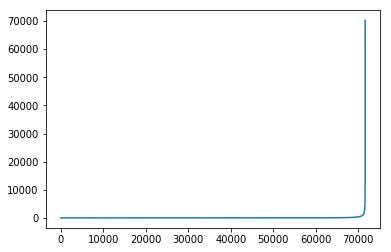

In [22]:
word2vec = Word2Vec(word_vec, min_count =1)
vocabulary=word2vec.wv.vocab
wordCount={i: vocabulary[i].count for i in vocabulary}
plt.plot(sorted(wordCount.values()))
len(vocabulary)

In [23]:
wordCount

{'all': 3791,
 'our': 1322,
 'patent': 1003,
 'are': 6129,
 'belong': 38,
 'you': 7178,
 'premarket': 179,
 'primer': 34,
 'tuesday': 634,
 'june': 1757,
 'bidding': 45,
 'hillshire': 328,
 'ramps': 60,
 'review': 5433,
 'family': 1501,
 'greatest': 154,
 'strength': 188,
 'heaven': 378,
 'for': 52621,
 'real': 1387,
 'madonna': 300,
 'shows': 3393,
 'off': 4337,
 'mother': 1115,
 'dragons': 111,
 'costume': 301,
 'house': 1665,
 'cards': 318,
 'actor': 1445,
 'corey': 37,
 'stoll': 28,
 'talks': 2642,
 'marvels': 283,
 'antman': 208,
 'role': 835,
 'with': 26965,
 'paul': 1701,
 'electric': 662,
 'sclass': 13,
 'hinted': 31,
 'mercedesbenz': 107,
 'executive': 409,
 'amazon': 4198,
 'showcases': 74,
 'fire': 1919,
 'phone': 2434,
 'views': 255,
 'and': 38016,
 'gesture': 39,
 'control': 812,
 'gas': 3151,
 'prices': 4098,
 'drop': 1438,
 'but': 5074,
 'could': 4934,
 'soon': 1154,
 'gold': 1807,
 'may': 7760,
 'test': 1666,
 '1200oz': 1,
 'okcupid': 347,
 'five': 1348,
 'things': 1687

In [24]:
temp = [word2vec.wv.get_vector(x) for x in vocabulary]

In [25]:
temp = pd.DataFrame(temp)
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.001925,-0.002076,-0.000544,-0.000388,-0.004979,-0.000546,-0.003718,-0.002876,0.002378,-0.002613,...,0.004166,-0.004731,0.001354,-0.002159,0.002862,-0.003438,0.004772,-0.001462,-0.004738,0.002775
1,-0.002557,0.002156,-0.001532,0.004027,-0.003493,-0.000070,0.001423,-0.001070,-0.001186,-0.002775,...,-0.001672,0.001741,-0.003373,0.000898,0.001250,0.004520,-0.000972,0.002927,0.000117,0.000965
2,-0.001081,0.001449,-0.004052,0.002754,0.000242,0.000589,0.000207,0.003918,-0.001300,-0.000208,...,-0.000902,-0.000120,-0.001770,-0.002251,0.000789,-0.001791,-0.003540,-0.003707,-0.001191,0.002318
3,0.004536,0.003901,0.000962,-0.003669,0.000461,-0.000319,0.004505,0.001262,-0.002913,-0.000192,...,-0.002703,-0.000446,0.001588,0.004033,-0.000962,-0.002032,-0.004133,-0.004485,0.001604,0.001887
4,0.000737,-0.000268,0.004841,-0.001292,0.002174,0.002596,0.003202,-0.004615,-0.002918,-0.004921,...,-0.003467,-0.002117,0.004274,0.004355,0.001893,-0.003270,0.001712,0.002703,0.000649,-0.000472


In [26]:
vocab =[i for i in vocabulary]
vocab = pd.DataFrame(vocab)
vocab.head()

,0
0,all
1,our
2,patent
3,are
4,belong


In [27]:
vocab.rename(columns={0: "Vocabulary"},inplace = True)


In [28]:
result = pd.concat([vocab,temp], axis=1, join='outer')

In [29]:
result.head()

,Vocabulary,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,all,-0.001925,-0.002076,-0.000544,-0.000388,-0.004979,-0.000546,-0.003718,-0.002876,0.002378,...,0.004166,-0.004731,0.001354,-0.002159,0.002862,-0.003438,0.004772,-0.001462,-0.004738,0.002775
1,our,-0.002557,0.002156,-0.001532,0.004027,-0.003493,-0.000070,0.001423,-0.001070,-0.001186,...,-0.001672,0.001741,-0.003373,0.000898,0.001250,0.004520,-0.000972,0.002927,0.000117,0.000965
2,patent,-0.001081,0.001449,-0.004052,0.002754,0.000242,0.000589,0.000207,0.003918,-0.001300,...,-0.000902,-0.000120,-0.001770,-0.002251,0.000789,-0.001791,-0.003540,-0.003707,-0.001191,0.002318
3,are,0.004536,0.003901,0.000962,-0.003669,0.000461,-0.000319,0.004505,0.001262,-0.002913,...,-0.002703,-0.000446,0.001588,0.004033,-0.000962,-0.002032,-0.004133,-0.004485,0.001604,0.001887
4,belong,0.000737,-0.000268,0.004841,-0.001292,0.002174,0.002596,0.003202,-0.004615,-0.002918,...,-0.003467,-0.002117,0.004274,0.004355,0.001893,-0.003270,0.001712,0.002703,0.000649,-0.000472


In [30]:
train_x = df_x["TITLE"].str.replace('[^\w\s]','')

In [31]:
train_x = pd.DataFrame(train_x)

In [32]:
train_x = train_x["TITLE"].str.lower()

In [33]:
train_x = pd.DataFrame(train_x)

In [34]:
train_x.head()

,TITLE
283843,all our patent are belong to you
267641,premarket primer tuesday june 3 bidding on hil...
123689,review family is greatest strength of heaven i...
14838,madonna shows off mother of dragons costume
39938,house of cards actor corey stoll in talks for ...


In [35]:
train_x.shape

(422419, 1)

In [36]:
l = []
for x in (train_x.values):
    for y in (x):
        l.append(y.split())

In [37]:
result.loc[result.Vocabulary=='sarah'].iloc[:,1:]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2756,-0.00187,0.000516,0.002034,0.002124,0.000025,0.002838,0.00436,-0.003319,-0.004262,0.004978,...,0.002623,0.002865,0.001197,-0.004182,0.001293,0.001722,0.001082,0.002149,0.00037,-0.004806


In [63]:
v = []
for x in l:
    temp = np.zeros((1,100))
    count = 0
    for y in x:
        if y in result['Vocabulary'].values:
            count +=1
            temp += result.loc[result['Vocabulary']==y].iloc[:,1:].values
    if count > 0:
        v.append(temp/count)
    else:
        print(x)
    


KeyboardInterrupt: 

In [61]:
result.loc[result['Vocabulary']=="our"].iloc[:,1:].values + result.loc[result['Vocabulary']=="result"].iloc[:,1:].values

array([[-1.66142901e-03,  6.25222945e-03,  2.40466092e-03,
         2.86912627e-03, -7.99937383e-03, -3.19824280e-03,
        -2.57519051e-03,  2.82066059e-04, -4.00284759e-03,
        -3.54627613e-04,  1.83047808e-03,  1.16847432e-03,
        -5.87801682e-03, -3.31363978e-03,  5.15481332e-03,
        -2.10019166e-03,  2.28521740e-03, -4.15497925e-06,
        -3.39434866e-03,  7.37262028e-03, -2.62512150e-03,
        -8.18923675e-03,  1.00308587e-03,  6.50203216e-03,
         3.25908279e-03, -7.67414924e-04, -6.88049686e-03,
         7.02082831e-03,  2.59225606e-04,  5.96612226e-04,
         7.65119493e-03,  1.59131130e-03,  1.34501909e-03,
         1.87415269e-03,  7.19489204e-03, -1.77473761e-04,
         4.82512591e-03, -8.52958532e-04, -4.77729752e-03,
        -7.36286235e-03,  2.06121110e-03, -1.65681215e-03,
        -1.53414765e-03, -4.80822075e-03,  3.62193365e-03,
        -2.96823314e-03,  5.89842792e-03, -2.42343056e-03,
        -4.92253248e-03, -3.22551711e-03, -3.44602135e-0

In [ ]:
Train = int(v.shape[0] * 0.6)
Validate = int(df.shape[0] * 0.2)
Test = int(v.shape[0] - Train - Validate)
Y = pd.get_dummies(df_y)

x1 =  v[:Train:]
y1 =  Y[:Train:]
x2 = v[Train:Validate + Train:]
y2 = Y[Train:Validate + Train:]
x3 = v[Validate + Train::]
y3 = Y[Validate + Train::]

In [ ]:
from ANN_Class import *

In [ ]:
train_op = ANN_Classification([100,100],[sigmoid,sigmoid])

In [ ]:
train_op